Phase 1:
-------------
Goal of collecting dataset:
--------------
Our objective is to leverage both classification and clustering techniques to develop a machine-learning model that predicts the risk of heart attacks in individuals. For classification, we aim to train our model to categorize individuals who have heart attack risks from those who don’t based on a comprehensive set of health and lifestyle factors. As for clustering, our model will be able to explore the underlying patterns within the data, identify distinct groups of individuals who share similar risk profiles, and create a set of clusters for these individuals, which in return will be used to predict new individuals’ results. 

Sourse of dataset:
----
Heart Attack Prediction: 
https://www.kaggle.com/datasets/m1relly/heart-attack-prediction/data

Read dataset:
--

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Dataset/heart.attack.csv')

General information about the dataset:
--
- Number of attributes: 12
- Number of objects: 4000
- Class label: Heart Attack Risk

In [5]:
num_objects= len(df)
attributes_info = pd.DataFrame({
    'Attribute Name': df.columns,
    'Data Type': df.dtypes.values
})

print(f"Number of attributes: {len(df.columns)}")
print('\n')
print("Attributes and their types:")
print(attributes_info)
print('\n')
print(f"Number of objects: {num_objects}")

Number of attributes: 12


Attributes and their types:
       Attribute Name Data Type
0          Patient ID    object
1                 Age     int64
2                 Sex    object
3         Cholesterol     int64
4      Blood Pressure    object
5          Heart Rate     int64
6            Diabetes     int64
7      Family History     int64
8             Smoking     int64
9                Diet    object
10          Continent    object
11  Heart Attack Risk     int64


Number of objects: 4000


As we can see, there are 4,000 objects, a total of 12 columns. Regarding data types, there are 7 integer attributes and 5 object attributes.

Phase 2 :
---------------
Attributes’ description table:


In [15]:
data = {
    "Attribute Name": [
        "Patient ID", "Age", "Sex", "Cholesterol", "Blood Pressure", "Heart Rate", "Diabetes", 
        "Family History", "Smoking", "Diet", "Continent", "Heart Attack Risk"
    ],
    "Description": [
        "Unique id of the patient", "Patient's age", "Gender of the patient", "Exam result of cholesterol", 
        "Result of blood pressure", "Heart beats", "Diabetes? 1 means the patient has diabetes, 0 means the patient does not have diabetes", 
        "Has the family heart attack story? 1 means the patient has a family heart attack history. 0 means he does not have", 
        "Smoking or not? 1 means the patient is smoking, 0 means he does not", 
        "The patient on diet or not?", "On which continent is the patient located?", 
        "The patient's risk of having a heart attack, 1 means the patient has heart attack risk, 0 means he does not have"
    ],
    "Data Type": [
        "Nominal", "Numeric", "Binary", "Numeric", "Numeric", "Numeric", "Binary", 
        "Binary", "Binary", "Nominal", "Nominal", "Binary"
    ],
    "Possible Values": [
        "", "Range between 18-90", "Female, Male", "Range between 120-400", "", "Range between 40-110", "0,1", 
        "0,1", "0,1", '"Average", "Healthy", "Unhealthy"', 
        '"Europe", "Africa", "Australia", "Asia", "South America", "North America"', "0,1"
    ]
}

df = pd.DataFrame(data)

df.style.set_properties(**{'text-align': 'center'})


,Attribute Name,Description,Data Type,Possible Values
0,Patient ID,Unique id of the patient,Nominal,
1,Age,Patient's age,Numeric,Range between 18-90
2,Sex,Gender of the patient,Binary,"Female, Male"
3,Cholesterol,Exam result of cholesterol,Numeric,Range between 120-400
4,Blood Pressure,Result of blood pressure,Numeric,
5,Heart Rate,Heart beats,Numeric,Range between 40-110
6,Diabetes,"Diabetes? 1 means the patient has diabetes, 0 means the patient does not have diabetes",Binary,"0,1"
7,Family History,Has the family heart attack story? 1 means the patient has a family heart attack history. 0 means he does not have,Binary,"0,1"
8,Smoking,"Smoking or not? 1 means the patient is smoking, 0 means he does not",Binary,"0,1"
9,Diet,The patient on diet or not?,Nominal,"""Average"", ""Healthy"", ""Unhealthy"""


In [27]:
sample=df.sample(n=20);
print(sample);

     Patient ID   Age     Sex   Cholesterol Blood Pressure   Heart Rate  \
3708    GGP5072    36    Male           244         150/90           61   
1469    MTY6835    37  Female           174         114/72           55   
702     KZR3302    29  Female           290         171/69           93   
3525    ZCO7946    27    Male           191         162/80           52   
224     LMH8932    23  Female           337         133/82           48   
3669    DSZ0030    85    Male           322        132/104           93   
1411    IKV9138    59    Male           343         162/74           67   
1841    RZD9305    49    Male           151         162/80          109   
1684    HUF2443    19    Male           373         98/104           91   
2228    FBI9619    81    Male           396         91/102           88   
1906    ECR5683    37    Male           209         116/70           89   
3864    RXH2187    54    Male           380         134/81           81   
3682    HSW5305    26  Fe

Understanding the data through graph representations:
--
To understand the relationship between heart attack and all attributes, particularly how they are associated with the possibility of contracting herat attack, the "heart attack risk" class label was predominantly used. It is connected to every attribute in the data and shows which persons are impacted or not. It also helps ascertain if men or women are more likely to experience a heart attack, as well as how age and heart attack risk are associated. This facilitates the comprehension of the variables affecting this illness and the identification of markers that may help with an early diagnosis.

Sex
Male      0.69675
Female    0.30325
Name: proportion, dtype: float64


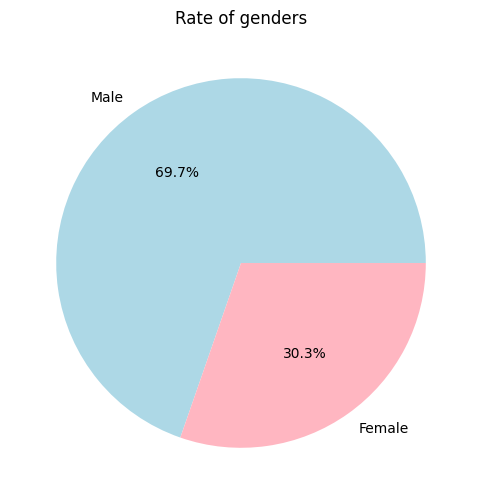

In [11]:
data2 = df ['Sex'].value_counts(normalize=True)
print(data2)
name = df['Sex'].value_counts().index.tolist()
value = df['Sex'].value_counts().tolist()
fig = plt.figure(figsize=(6,6))
plt.pie(value, labels=name,autopct='%1.1f%%',colors=['#ADD8E6','#FFB6C1'])
plt.title('Rate of genders')
plt.show()

The pie chart shows that men are significantly more susceptible to heart attacks than women.

 Heart Rate
72     0.01875
81     0.01850
94     0.01775
57     0.01775
97     0.01700
        ...   
70     0.01175
103    0.01125
106    0.01125
73     0.01050
96     0.01025
Name: proportion, Length: 71, dtype: float64


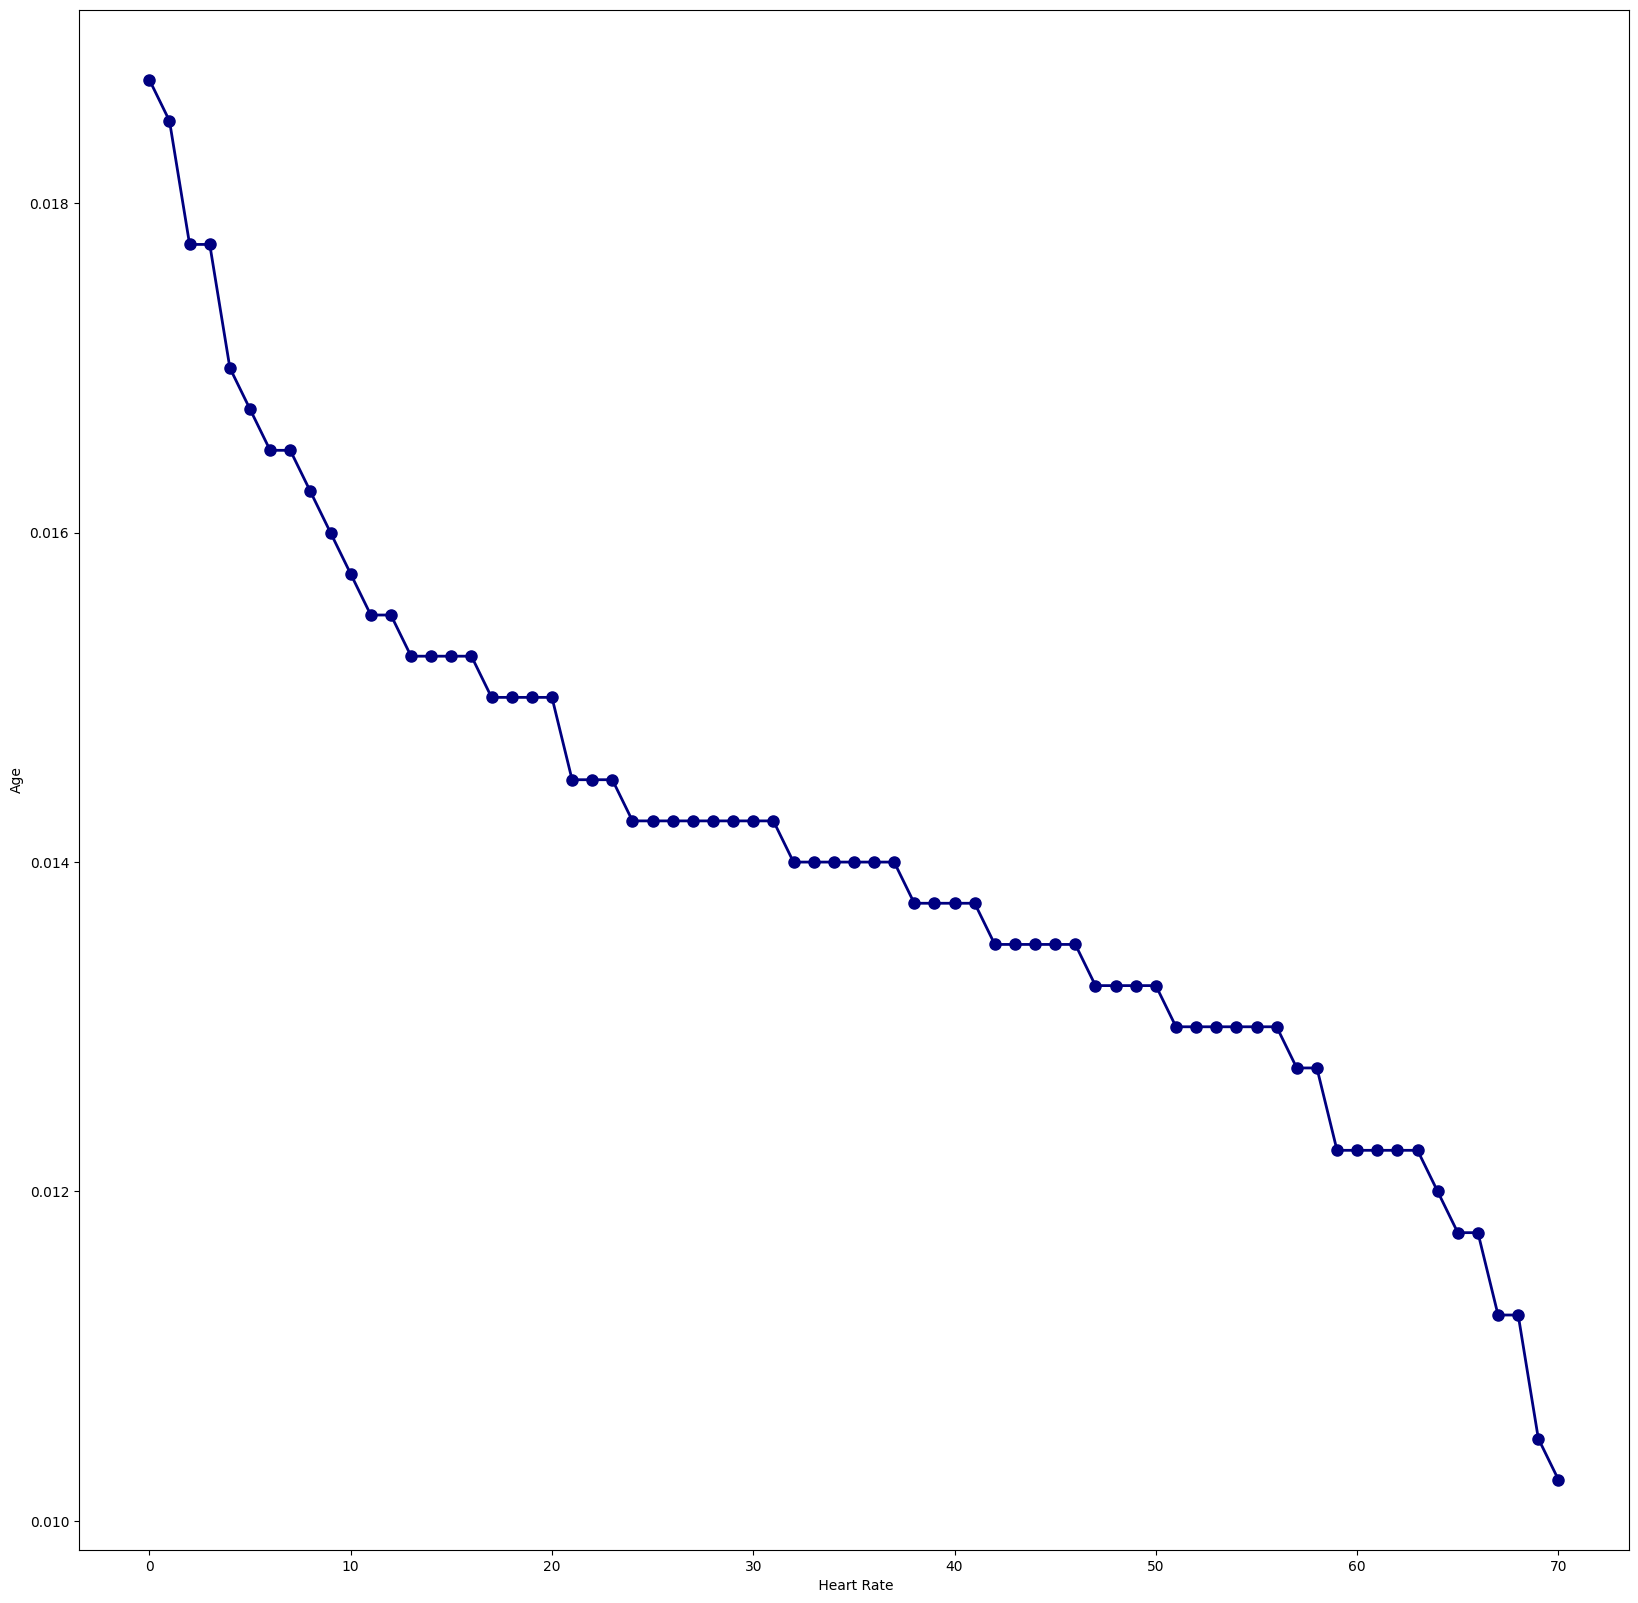

In [17]:
data3 = df[' Heart Rate'].value_counts(normalize=True)
print(data3)
x = range(len(data3))
y= data3.values
plt.figure(figsize=(20,20))
plt.plot(x,y, color='#000080', marker='o', linestyle='-', linewidth=2, markersize=8, label='Pink Line')
plt.xlabel(' Heart Rate')
plt.ylabel('Age')
plt.show()

The graph (dot plot) shows that the relationship between age and heart rate is an inverse relationship, where the older a person gets, the lower the heart rate. In addition, a lower heart rate may lead to the risk of a heart attack.

Heart Attack Risk
0    53.7
1    46.3
Name: proportion, dtype: float64


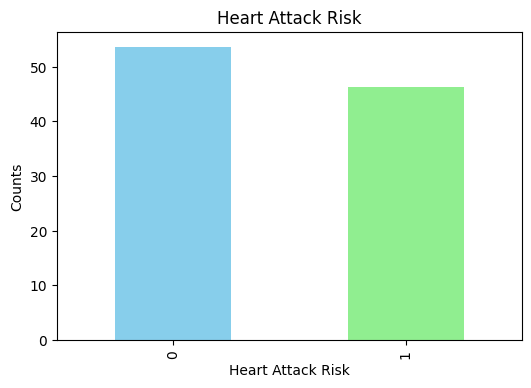

In [19]:
data4=df['Heart Attack Risk'].value_counts(normalize=True)*100
print(data4)
plt.figure(figsize=(6, 4))
data4.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Counts')
plt.show()

[Text(0, 0, 'No Diabetes, No Smoking'),
 Text(1, 0, 'No Diabetes, Smoking'),
 Text(2, 0, 'Diabetes, No Smoking'),
 Text(3, 0, 'Diabetes, Smoking')]

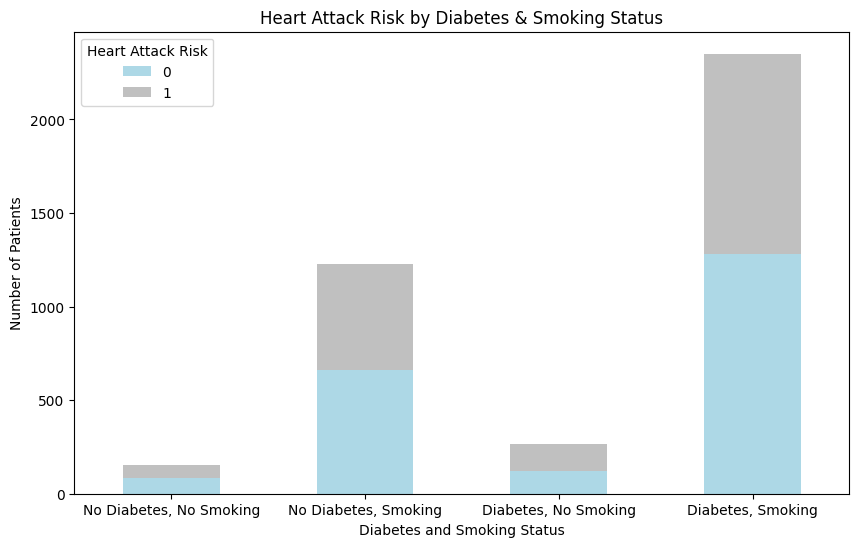

In [2]:
crosstab_data = pd.crosstab([df['Diabetes'], df['Smoking']], df['Heart Attack Risk'])

ax = crosstab_data.plot(kind='bar', stacked=True, color= ['lightBlue', 'silver'], figsize=(10, 6))

plt.title('Heart Attack Risk by Diabetes & Smoking Status')
plt.xlabel('Diabetes and Smoking Status')
plt.ylabel('Number of Patients')
ax.set_xticklabels(['No Diabetes, No Smoking', 'No Diabetes, Smoking',  
                    'Diabetes, No Smoking', 'Diabetes, Smoking'], rotation=0)

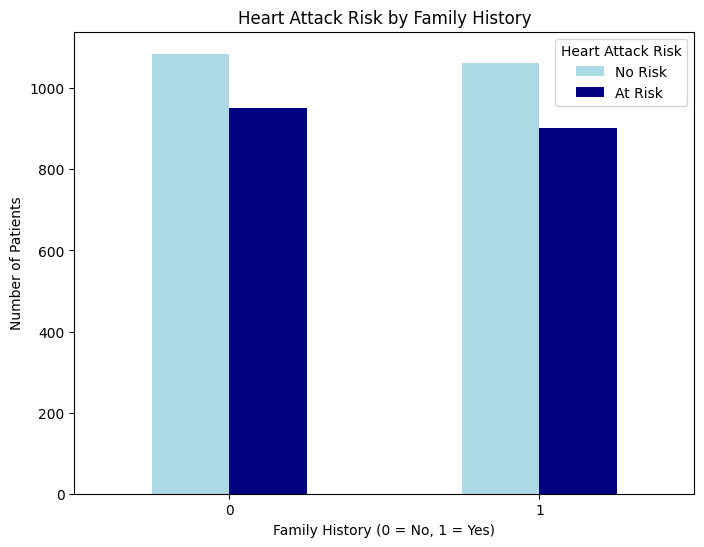

In [3]:
family_history_counts = df.groupby(['Family History', 'Heart Attack Risk']).size().unstack()

family_history_counts.plot(kind='bar', figsize=(8, 6), color=['lightBlue', 'navy'])
plt.title('Heart Attack Risk by Family History')
plt.xlabel('Family History (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Attack Risk', labels=['No Risk', 'At Risk'])
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_6841/2425015413.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Heart Attack Risk'] == 0][' Cholesterol'],


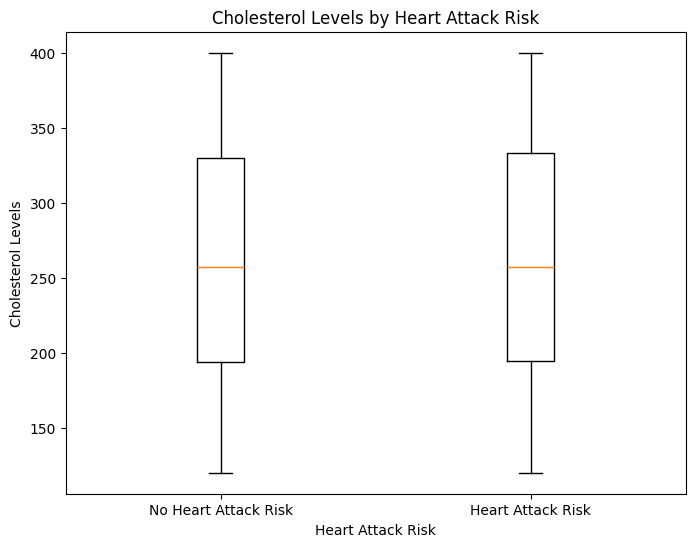

In [4]:
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Heart Attack Risk'] == 0][' Cholesterol'], 
             df[df['Heart Attack Risk'] == 1][' Cholesterol']],
            labels=['No Heart Attack Risk', 'Heart Attack Risk'])

plt.title('Cholesterol Levels by Heart Attack Risk')
plt.ylabel('Cholesterol Levels')
plt.xlabel('Heart Attack Risk')
plt.show()

Data Preprocessing:
-
Show the missing values:


In [7]:
missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()
rows_with_missing = df.isnull().sum(axis=1)
print("Rows with missing values:")
print(rows_with_missing);

Missing values in each column:
Patient ID           0
 Age                 0
Sex                  0
 Cholesterol         0
Blood Pressure       0
 Heart Rate          0
Diabetes             0
Family History       0
Smoking              0
Diet                 0
Continent            0
Heart Attack Risk    0
dtype: int64

Rows with missing values:
0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    0
3997    0
3998    0
3999    0
Length: 4000, dtype: int64


Summary for data:


In [6]:
summary_stats=df.describe();
print(summary_stats);

               Age   Cholesterol   Heart Rate    Diabetes  Family History  \
count  4000.000000   4000.000000  4000.000000  4000.00000     4000.000000   
mean     53.759000    260.714500    74.925750     0.65450        0.491000   
std      21.503942     80.671345    20.368148     0.47559        0.499981   
min      18.000000    120.000000    40.000000     0.00000        0.000000   
25%      35.000000    194.000000    57.000000     0.00000        0.000000   
50%      54.000000    257.000000    75.000000     1.00000        0.000000   
75%      73.000000    331.000000    93.000000     1.00000        1.000000   
max      90.000000    400.000000   110.000000     1.00000        1.000000   

           Smoking  Heart Attack Risk  
count  4000.000000        4000.000000  
mean      0.894750           0.463000  
std       0.306914           0.498691  
min       0.000000           0.000000  
25%       1.000000           0.000000  
50%       1.000000           0.000000  
75%       1.000000        

Calculate the variance :

In [7]:
variance= df.var(numeric_only=True);
print(variance)

 Age                  462.419524
 Cholesterol         6507.865956
 Heart Rate           414.861452
Diabetes                0.226186
Family History          0.249981
Smoking                 0.094196
Heart Attack Risk       0.248693
dtype: float64


Calculate the mean :

In [15]:
Mean = df.mean(numeric_only=True)
print(Mean)

 Age                  53.75900
 Cholesterol         260.71450
 Heart Rate           74.92575
Diabetes               0.65450
Family History         0.49100
Smoking                0.89475
Heart Attack Risk      0.46300
dtype: float64
